In [1]:
# Import libraries and set up data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_2015 = pd.read_csv('/Users/saeedazad/Desktop/QLD_Electricty/QLD_Demand_2015.csv')
df_2016 = pd.read_csv('/Users/saeedazad/Desktop/QLD_Electricty/QLD_Demand_2016.csv')
df_2017 = pd.read_csv('/Users/saeedazad/Desktop/QLD_Electricty/QLD_Demand_2017.csv')
df_2018 = pd.read_csv('/Users/saeedazad/Desktop/QLD_Electricty/QLD_Demand_2018.csv')
df_2019 = pd.read_csv('/Users/saeedazad/Desktop/QLD_Electricty/QLD_Demand_2019.csv')

In [3]:
df_2015['date'] = pd.to_datetime(df_2015['Year'].map(str)+ df_2015['Month'].map(str) + df_2015['Day'].map(str),format ='%Y%m%d')
df_2016['date'] = pd.to_datetime(df_2016['Year'].map(str)+ df_2016['Month'].map(str) + df_2016['Day'].map(str),format ='%Y%m%d')
df_2017['date'] = pd.to_datetime(df_2017['Year'].map(str)+ df_2017['Month'].map(str) + df_2017['Day'].map(str),format ='%Y%m%d')
df_2018['date'] = pd.to_datetime(df_2018['Year'].map(str)+ df_2018['Month'].map(str) + df_2018['Day'].map(str),format ='%Y%m%d')
df_2019['date'] = pd.to_datetime(df_2019['Year'].map(str)+ df_2019['Month'].map(str) + df_2019['Day'].map(str),format ='%Y%m%d')


In [4]:
df = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019])
len(df)

1827

### Deliverable 1 : predict half hourly Queensland electricity demand  for 2020 based on historic average

In [5]:
# To create the baseline model, first I excluded 2020 data from the historical data so the baseline data reflect pre-covid patterns.
df_hist = df[ (df.date.dt.year !=2020)]
df_hist.tail()


,Year,Month,Day,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,date
179,2019,12,27,5336.484578,5213.382592,5118.980088,5053.730345,5040.903302,4981.322897,4967.010242,...,6728.517071,6611.567049,6475.442235,6314.978223,6196.725035,6097.197271,5971.317303,5718.667107,5516.256703,2019-12-27
180,2019,12,28,5370.050524,5219.959145,5131.978128,5076.776457,5029.016698,4987.493933,4964.476354,...,6876.095785,6726.207580,6546.532933,6421.757432,6320.654199,5993.312982,5894.147446,5838.716515,5640.998929,2019-12-28
181,2019,12,29,5501.442774,5352.029051,5276.461985,5205.938601,5186.720681,5141.378739,5122.791422,...,6940.669072,6816.454230,6609.298971,6452.794154,6288.807820,6184.630383,6058.474502,5825.913924,5581.537181,2019-12-29
182,2019,12,30,5439.325038,5274.027048,5187.369816,5139.884204,5102.728991,5076.458825,5077.651308,...,6728.319195,6568.880807,6395.404912,6317.153012,6234.146352,6195.428376,6109.497997,5913.383122,5720.917145,2019-12-30
183,2019,12,31,5579.177224,5398.407143,5293.480909,5253.722874,5195.915466,5197.211454,5166.386229,...,7578.942335,7462.505000,7247.271302,7033.829865,6839.411682,6635.673003,6469.284250,6223.640824,5976.672411,2019-12-31


In [6]:
df1 =df.drop(['Day','Month','Year','date'],axis=1)
columns = df1.columns
columns.values

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48'], dtype=object)

In [7]:
## I grouped by month and day to get the average for each of the 48 half-hourly time intervals
# Since the 2015 data start in July, averages for January-June were calculated from four values 
# while averages for July-Dec were from five values.

df_hist = df_hist.groupby(['Month','Day'])[columns].mean()
df_hist

1            2            3            4            5  \
Month Day                                                                    
1     1    5852.680493  5737.567103  5615.764430  5531.742920  5447.605645   
      2    5632.461606  5487.935021  5363.866206  5266.091178  5225.096961   
      3    5732.025049  5601.031687  5481.013718  5390.988178  5345.704546   
      4    5591.475531  5447.063024  5321.589175  5238.835564  5188.126336   
      5    5509.171952  5373.223363  5249.384786  5154.461367  5094.958259   
...                ...          ...          ...          ...          ...   
12    27   5660.346920  5511.471406  5410.184898  5325.735213  5272.734077   
      28   5484.081975  5338.246389  5316.228203  5236.738306  5184.281392   
      29   5563.783685  5420.834061  5315.657535  5227.324788  5167.533672   
      30   5521.758012  5390.839597  5284.629263  5220.032914  5173.275516   
      31   5562.691934  5403.428320  5292.385370  5210.303950  5159.762383   

                     6            7            8            9           10  \
Month Day                                                                    
1     1    5394.700537  5352.527236  5309.453514  5301.798190  5284.887330   
      2    5192.479039  5186.143797  5179.295031  5196.088305  5225.551609   
      3    5316.615560  5279.059900  5268.816785  5304.429383  5311.860789   
      4    5156.340850  5133.232131  5120.225319  5135.167913  5124.747985   
      5    5050.329402  5048.108770  5049.456268  5033.852973  5030.029559   
...                ...          ...          ...          ...          ...   
12    27   5237.661014  5220.782665  5214.148118  5236.962126  5259.827584   
      28   5148.488099  5122.134352  5097.199954  5097.223082  5082.210998   
      29   5128.366660  5105.546848  5121.146798  5108.946377  5092.875098   
      30   5143.138454  5131.229047  5124.603666  5145.902729  5187.295939   
      31   5135.934482  5129.084080  5134.239093  5163.715048  5202.320216   

           ...           39           40           41           42  \
Month Day  ...                                                       
1     1    ...  7176.657903  7132.427397  6999.041655  6778.294291   
      2    ...  7237.268569  7240.641405  7126.296953  6933.054266   
      3    ...  7071.178162  7074.741818  6960.213911  6792.459482   
      4    ...  6736.482313  6748.801490  6651.502266  6487.360537   
      5    ...  6807.585095  6797.335381  6711.735470  6520.715906   
...        ...          ...          ...          ...          ...   
12    27   ...  7101.053099  7086.710656  6976.562320  6805.661970   
      28   ...  6811.393996  6806.958936  6722.248287  6564.659590   
      29   ...  6621.195733  6608.357084  6518.395745  6370.940190   
      30   ...  7226.493673  7176.310047  7031.056763  6855.197727   
      31   ...  7359.562022  7327.723233  7202.735211  7013.811299   

                    43           44           45           46           47  \
Month Day                                                                    
1     1    6624.668406  6465.805474  6316.609753  6198.455163  6015.530373   
      2    6729.619394  6549.923826  6368.972896  6240.964075  6077.857541   
      3    6659.044517  6524.471739  6401.686792  6309.416481  6125.593917   
      4    6358.869402  6259.527132  6166.459325  6091.403528  5906.684966   
      5    6385.849823  6232.097444  6114.721453  6023.380459  5827.807286   
...                ...          ...          ...          ...          ...   
12    27   6657.821905  6517.210210  6391.762713  6279.782067  6081.458575   
      28   6445.048109  6335.095981  6191.430813  6109.106972  5959.396095   
      29   6268.319748  6169.590618  6082.928244  6007.567134  5846.213897   
      30   6706.202577  6534.837644  6378.823093  6265.401723  6086.281270   
      31   6834.970146  6653.707057  6484.508474  6355.640570  6142.986106   

                    48  
Month Day               
1     1    5805

In [8]:


df_hist = df_hist.reset_index()
df_hist['date'] = pd.to_datetime('2020'+ df_hist['Month'].map(str) + df_hist['Day'].map(str),format ='%Y%m%d')


In [9]:
df_hist = df_hist.drop(['Month','Day'],axis=1)

In [10]:
## Deliverable # 1 (predicted_2020.csv) contains the baseline historical data. 
## It has 366 rows for each day of the year and 48 colums for each half-hourly time intervals

df_hist.to_csv('predicted_2020.csv',columns =['date','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'
                                             ,'21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40',
                                             '41','42','43','44','45','46','47','48'])

###  Deliverable 2 : Daily electricity demand for April 2020

In [11]:
df_04_actual = pd.read_csv('/Users/saeedazad/Desktop/QLD_Electricty/PRICE_AND_DEMAND_202004_QLD1.csv',parse_dates=['SETTLEMENTDATE'])
df_04_actual.columns =['region','date','total','rpr','type']

In [12]:
## I removed first interval for 2020/05/01 as there is only one value for midnight, so I could not visualize 
## the whole day.

df_04_actual = df_04_actual[df_04_actual.date.dt.month != 5]
df_04_actual.head()

,region,date,total,rpr,type
0,QLD1,2020-04-01 00:30:00,5710.84,48.67,TRADE
1,QLD1,2020-04-01 01:00:00,5604.44,51.50,TRADE
2,QLD1,2020-04-01 01:30:00,5511.97,49.06,TRADE
3,QLD1,2020-04-01 02:00:00,5419.03,46.53,TRADE
4,QLD1,2020-04-01 02:30:00,5406.11,38.32,TRADE


In [13]:
 df_04_actual.set_index('date', inplace = True)

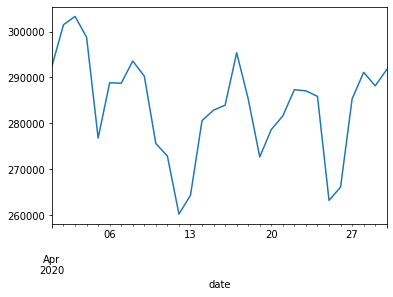

In [14]:
## It can be seen there is a lot of variation across April, fluctuating on a weekly timescale. 
# Aside from the weekly fluctuations, there is no clear trend to increase or decrease across the month.

df_04_actual = df_04_actual['total'].resample('D').sum()
df_04_actual.plot()

In [15]:
## Total daily electricty demand for April 2020 ranges from 260186 to 303291.
df_04_actual.min()

260186.67000000007

In [16]:
df_04_actual.max()

303291.76999999996

### Deliverable 3 : Visualization of recent electricy demand

####  I compared recent actual daily electricity demand against predicted demand for one month (April 2020)

In [17]:
df_hist = pd.read_csv('/Users/saeedazad/Desktop/QLD_Electricty/predicted_2020.csv',parse_dates=['date'],index_col=0)
df_hist.head()

,date,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,2020-01-01,5852.680493,5737.567103,5615.764430,5531.742920,5447.605645,5394.700537,5352.527236,5309.453514,5301.798190,...,7176.657903,7132.427397,6999.041655,6778.294291,6624.668406,6465.805474,6316.609753,6198.455163,6015.530373,5805.471148
1,2020-01-02,5632.461606,5487.935021,5363.866206,5266.091178,5225.096961,5192.479039,5186.143797,5179.295031,5196.088305,...,7237.268569,7240.641405,7126.296953,6933.054266,6729.619394,6549.923826,6368.972896,6240.964075,6077.857541,5881.771316
2,2020-01-03,5732.025049,5601.031687,5481.013718,5390.988178,5345.704546,5316.615560,5279.059900,5268.816785,5304.429383,...,7071.178162,7074.741818,6960.213911,6792.459482,6659.044517,6524.471739,6401.686792,6309.416481,6125.593917,5911.740136
3,2020-01-04,5591.475531,5447.063024,5321.589175,5238.835564,5188.126336,5156.340850,5133.232131,5120.225319,5135.167913,...,6736.482313,6748.801490,6651.502266,6487.360537,6358.869402,6259.527132,6166.459325,6091.403528,5906.684966,5704.385195
4,2020-01-05,5509.171952,5373.223363,5249.384786,5154.461367,5094.958259,5050.329402,5048.108770,5049.456268,5033.852973,...,6807.585095,6797.335381,6711.735470,6520.715906,6385.849823,6232.097444,6114.721453,6023.380459,5827.807286,5624.424784


In [18]:
## Filter data for April.
filt = (df_hist['date']>='2020-04-01') & (df_hist['date']<'2020-05-01')

df_hist_april = df_hist.loc[filt]
df_hist_april.head()

,date,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
91,2020-04-01,5347.682319,5212.564766,5174.304237,5097.957739,5063.993367,5044.176244,5027.378885,5027.687295,5072.305002,...,6836.969101,6738.416489,6644.852500,6468.711461,6303.577874,6103.873675,5923.215220,5826.640976,5679.664415,5464.549942
92,2020-04-02,5286.591591,5188.790357,5146.151667,5080.098727,5036.615256,5023.766333,5019.814626,5029.085341,5079.239841,...,6899.023822,6805.178771,6711.727073,6528.602423,6353.819922,6186.043270,6045.417081,5949.111961,5771.940219,5568.148366
93,2020-04-03,5334.101317,5193.533424,5148.896615,5075.681201,5035.748296,5008.616868,4997.747548,5005.368283,5043.333642,...,6668.308849,6569.557847,6484.328601,6326.745403,6205.674797,6089.876701,5979.834948,5895.280796,5736.295795,5532.248035
94,2020-04-04,5340.837864,5209.953892,5107.861939,5082.484913,5024.198010,4993.277680,4974.851887,4965.258097,4978.915105,...,6412.390407,6328.056698,6244.735093,6097.109266,6001.874569,5904.219639,5832.635073,5787.451395,5643.864296,5444.376123
95,2020-04-05,5272.078992,5138.387596,5090.659770,5008.945506,4944.958783,4913.239089,4891.965265,4870.647536,4888.621733,...,6527.682317,6430.208922,6345.603634,6176.333398,6033.784217,5913.990495,5826.578537,5744.336917,5590.529295,5419.972893


In [19]:
# I calculated total electricty data for each day in April.

df_hist_april['sum_day']  = df_hist_april.iloc[:, 1:49].sum(axis=1)

<ipython-input-19-e2b81700a090>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist_april['sum_day']  = df_hist_april.iloc[:, 1:49].sum(axis=1)


In [20]:
df_hist_april.head()

,date,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,sum_day
91,2020-04-01,5347.682319,5212.564766,5174.304237,5097.957739,5063.993367,5044.176244,5027.378885,5027.687295,5072.305002,...,6738.416489,6644.852500,6468.711461,6303.577874,6103.873675,5923.215220,5826.640976,5679.664415,5464.549942,280551.599441
92,2020-04-02,5286.591591,5188.790357,5146.151667,5080.098727,5036.615256,5023.766333,5019.814626,5029.085341,5079.239841,...,6805.178771,6711.727073,6528.602423,6353.819922,6186.043270,6045.417081,5949.111961,5771.940219,5568.148366,279383.136579
93,2020-04-03,5334.101317,5193.533424,5148.896615,5075.681201,5035.748296,5008.616868,4997.747548,5005.368283,5043.333642,...,6569.557847,6484.328601,6326.745403,6205.674797,6089.876701,5979.834948,5895.280796,5736.295795,5532.248035,271344.663422
94,2020-04-04,5340.837864,5209.953892,5107.861939,5082.484913,5024.198010,4993.277680,4974.851887,4965.258097,4978.915105,...,6328.056698,6244.735093,6097.109266,6001.874569,5904.219639,5832.635073,5787.451395,5643.864296,5444.376123,256248.109821
95,2020-04-05,5272.078992,5138.387596,5090.659770,5008.945506,4944.958783,4913.239089,4891.965265,4870.647536,4888.621733,...,6430.208922,6345.603634,6176.333398,6033.784217,5913.990495,5826.578537,5744.336917,5590.529295,5419.972893,252183.869840


Text(0.5, 0, 'Day')

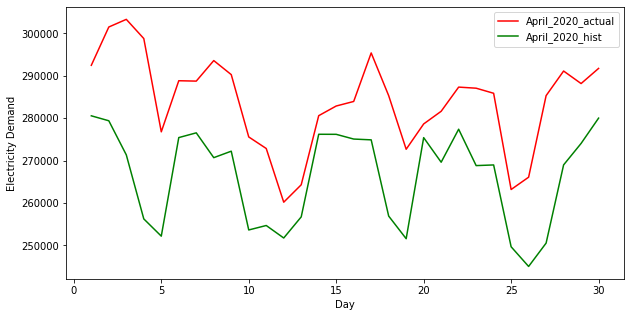

In [21]:
# Compare April 2020 from recent actual database to the baseline model  

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_hist_april.date.dt.day,df_04_actual.values,color = 'red', label = 'April_2020_actual')
ax.plot(df_hist_april.date.dt.day,df_hist_april['sum_day'],color = 'green', label = 'April_2020_hist')
#ax.plot(df_hist_april.date.dt.day,df_04_notactual['sum_day'],color = 'black', label = 'April_2020_from_dt_2019')
ax.legend()
ax.set_ylabel('Electricity Demand')
ax.set_xlabel('Day')

In [66]:
percentage_df = pd.DataFrame(percentage_value)
percentage_df['date'] = df_hist_april['date']
percentage_df.columns =['increase_percentage','date']
percentage_df[percentage_df['increase_percentage']== percentage_df['increase_percentage'].max()]


,increase_percentage,date
94,16.593028,2020-04-04


In [67]:
percentage_df[percentage_df['increase_percentage']== percentage_df['increase_percentage'].min()]

,increase_percentage,date
110,1.171155,2020-04-20


### It is obvious from the plot that actual electricity demand in April has increased against our historical baseline model (data from 2015-2019). The covid-related increase in energy demand in April 2020 was between 1% (20th April) and 16% (4th April). Regardless of the increase in April 2020, we can still see how electricity demand fluctuated on weekly time scale. The impact of Covid-19 on Queensland electricy demand can be seen easily for April 2020 from the plots. 

###  Bonus points : provide visualization for an entire week

In [23]:
df_hist_april['day'] = df_hist_april['date'].dt.day_name()

<ipython-input-23-9bdd123ce089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist_april['day'] = df_hist_april['date'].dt.day_name()


In [24]:
df_hist_april.head()

,date,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,sum_day,day
91,2020-04-01,5347.682319,5212.564766,5174.304237,5097.957739,5063.993367,5044.176244,5027.378885,5027.687295,5072.305002,...,6644.852500,6468.711461,6303.577874,6103.873675,5923.215220,5826.640976,5679.664415,5464.549942,280551.599441,Wednesday
92,2020-04-02,5286.591591,5188.790357,5146.151667,5080.098727,5036.615256,5023.766333,5019.814626,5029.085341,5079.239841,...,6711.727073,6528.602423,6353.819922,6186.043270,6045.417081,5949.111961,5771.940219,5568.148366,279383.136579,Thursday
93,2020-04-03,5334.101317,5193.533424,5148.896615,5075.681201,5035.748296,5008.616868,4997.747548,5005.368283,5043.333642,...,6484.328601,6326.745403,6205.674797,6089.876701,5979.834948,5895.280796,5736.295795,5532.248035,271344.663422,Friday
94,2020-04-04,5340.837864,5209.953892,5107.861939,5082.484913,5024.198010,4993.277680,4974.851887,4965.258097,4978.915105,...,6244.735093,6097.109266,6001.874569,5904.219639,5832.635073,5787.451395,5643.864296,5444.376123,256248.109821,Saturday
95,2020-04-05,5272.078992,5138.387596,5090.659770,5008.945506,4944.958783,4913.239089,4891.965265,4870.647536,4888.621733,...,6345.603634,6176.333398,6033.784217,5913.990495,5826.578537,5744.336917,5590.529295,5419.972893,252183.869840,Sunday


In [25]:
## 2020-04-06 2020-04-12 Moday to Sunday checking for a week 
filt = (df_hist_april['date']>='2020-04-06') & (df_hist_april['date']<='2020-04-12')

df_hist_week = df_hist_april.loc[filt]
df_hist_week

,date,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,sum_day,day
96,2020-04-06,5248.879560,5128.539100,5094.886391,5025.887998,4979.994053,4971.770931,4959.348265,4971.680141,5013.378942,...,6679.631751,6494.534666,6343.477001,6191.904444,6053.692569,5955.348218,5772.763851,5570.275734,275418.664848,Monday
97,2020-04-07,5372.327547,5253.325933,5210.971869,5128.614751,5085.119870,5051.017350,5040.601062,5030.334641,5077.641195,...,6709.190633,6522.251081,6362.406389,6204.465544,6063.798963,5970.437742,5781.596243,5574.078489,276536.007423,Tuesday
98,2020-04-08,5365.478461,5225.948134,5129.464875,5100.169351,5058.784703,5018.423633,5010.050872,5004.841326,5049.707643,...,6631.105345,6447.236780,6303.459152,6154.009780,6017.151766,5921.136647,5733.166695,5540.697774,270686.169794,Wednesday
99,2020-04-09,5349.726871,5219.812819,5106.477336,5041.336408,5058.786732,5030.222009,5017.116373,5014.571297,5001.556416,...,6663.785120,6498.814259,6316.872140,6161.838689,6038.323135,5946.848994,5781.814297,5570.581323,272210.338231,Thursday
100,2020-04-10,5406.168827,5265.741184,5137.887671,5121.396337,5051.458511,5018.888627,4998.085116,4982.643811,4972.963017,...,6193.159607,6050.967857,5963.793700,5873.056657,5802.773708,5745.520321,5606.556015,5416.177592,253641.191608,Friday
101,2020-04-11,5246.605441,5124.921545,5085.855578,5020.055536,4983.296409,4940.850746,4918.534611,4915.011993,4922.277548,...,6216.520516,6079.099786,5984.318850,5906.016511,5830.676004,5771.851195,5624.159547,5461.878822,254692.192623,Saturday
102,2020-04-12,5280.272405,5138.110363,5087.669838,5023.243467,4986.322293,4942.992970,4931.629929,4899.780901,4912.229780,...,6121.488270,5998.181688,5901.044009,5811.314096,5746.528069,5679.114271,5530.673526,5353.012044,251745.295009,Sunday


In [26]:
df_04_dataframe = pd.DataFrame(df_04_actual)
df_04_dataframe.head()

,total
date,
2020-04-01,292460.36
2020-04-02,301486.08
2020-04-03,303291.77
2020-04-04,298767.43
2020-04-05,276776.00


##### Visualisation for one week (Monday to Sunday)

In [27]:
df_actual_week = df_04_dataframe['2020-04-06': '2020-04-12']['total'].resample('D').sum()

Text(0.5, 0, 'Day')

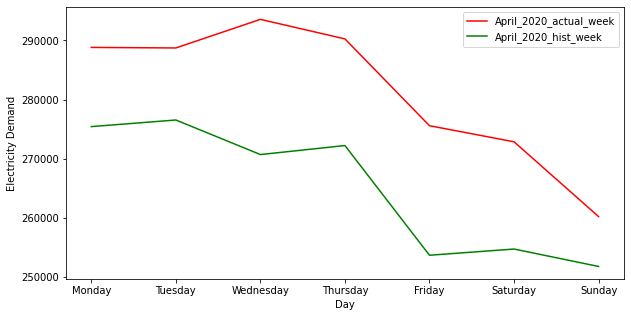

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df_hist_week.date.dt.day_name(),df_actual_week.values,color = 'red', label = 'April_2020_actual_week')
ax.plot(df_hist_week.date.dt.day_name(),df_hist_week['sum_day'],color = 'green', label = 'April_2020_hist_week')
ax.legend()
ax.set_ylabel('Electricity Demand')
ax.set_xlabel('Day')

#### As expected, there is a substantial increase between recent 2020 actual data and the historic average. It can be seen from the above plot, Tuesday is peak day for electricity demand for historic model while Wednesday is peak day for actual data. However, in both datasets we see a general decline in electricy for Thursday to Sunday.

###### Bonus points : Allow users to select which day to viualise

In [29]:
df_hist.head()

,date,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,2020-01-01,5852.680493,5737.567103,5615.764430,5531.742920,5447.605645,5394.700537,5352.527236,5309.453514,5301.798190,...,7176.657903,7132.427397,6999.041655,6778.294291,6624.668406,6465.805474,6316.609753,6198.455163,6015.530373,5805.471148
1,2020-01-02,5632.461606,5487.935021,5363.866206,5266.091178,5225.096961,5192.479039,5186.143797,5179.295031,5196.088305,...,7237.268569,7240.641405,7126.296953,6933.054266,6729.619394,6549.923826,6368.972896,6240.964075,6077.857541,5881.771316
2,2020-01-03,5732.025049,5601.031687,5481.013718,5390.988178,5345.704546,5316.615560,5279.059900,5268.816785,5304.429383,...,7071.178162,7074.741818,6960.213911,6792.459482,6659.044517,6524.471739,6401.686792,6309.416481,6125.593917,5911.740136
3,2020-01-04,5591.475531,5447.063024,5321.589175,5238.835564,5188.126336,5156.340850,5133.232131,5120.225319,5135.167913,...,6736.482313,6748.801490,6651.502266,6487.360537,6358.869402,6259.527132,6166.459325,6091.403528,5906.684966,5704.385195
4,2020-01-05,5509.171952,5373.223363,5249.384786,5154.461367,5094.958259,5050.329402,5048.108770,5049.456268,5033.852973,...,6807.585095,6797.335381,6711.735470,6520.715906,6385.849823,6232.097444,6114.721453,6023.380459,5827.807286,5624.424784


In [30]:
## write a function to visualize baseline model for 2020 by entring date value by user
def visualize_day(date):
    df_hist_day = df_hist.loc[df_hist.date == date ]
    df_hist_vis = df_hist_day.iloc[:,1:49]
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(range(1,len(df_hist_vis.columns)+1),df_hist_vis.values[0])

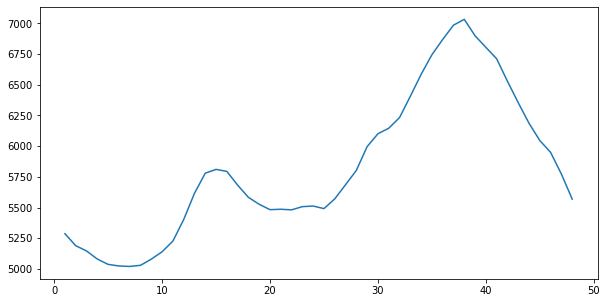

In [71]:
# Please enter the day of your choice here:
visualize_day('2020-04-02')